In [10]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import keras 
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.callbacks import EarlyStopping 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
df= pd.read_csv('/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv',parse_dates=True , index_col="Date")

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


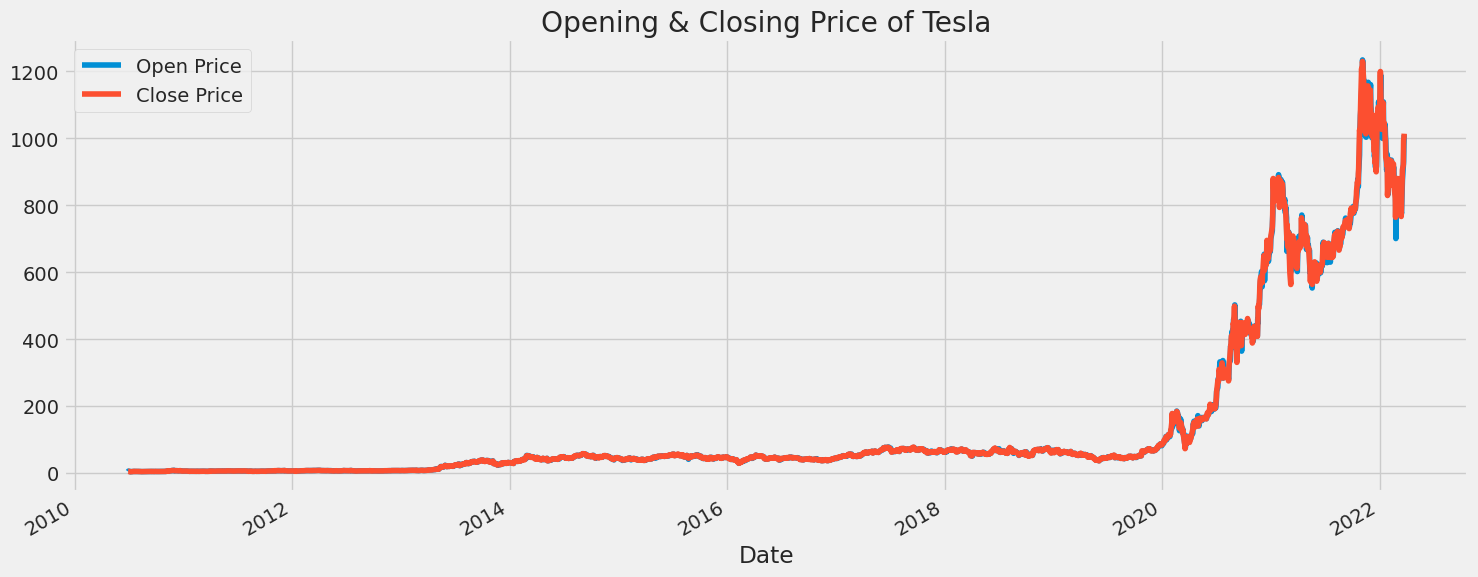

In [14]:
plt.figure(figsize=(15,6))
df['Open'].plot()
df['Close'].plot()
plt.title('Opening & Closing Price of Tesla')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

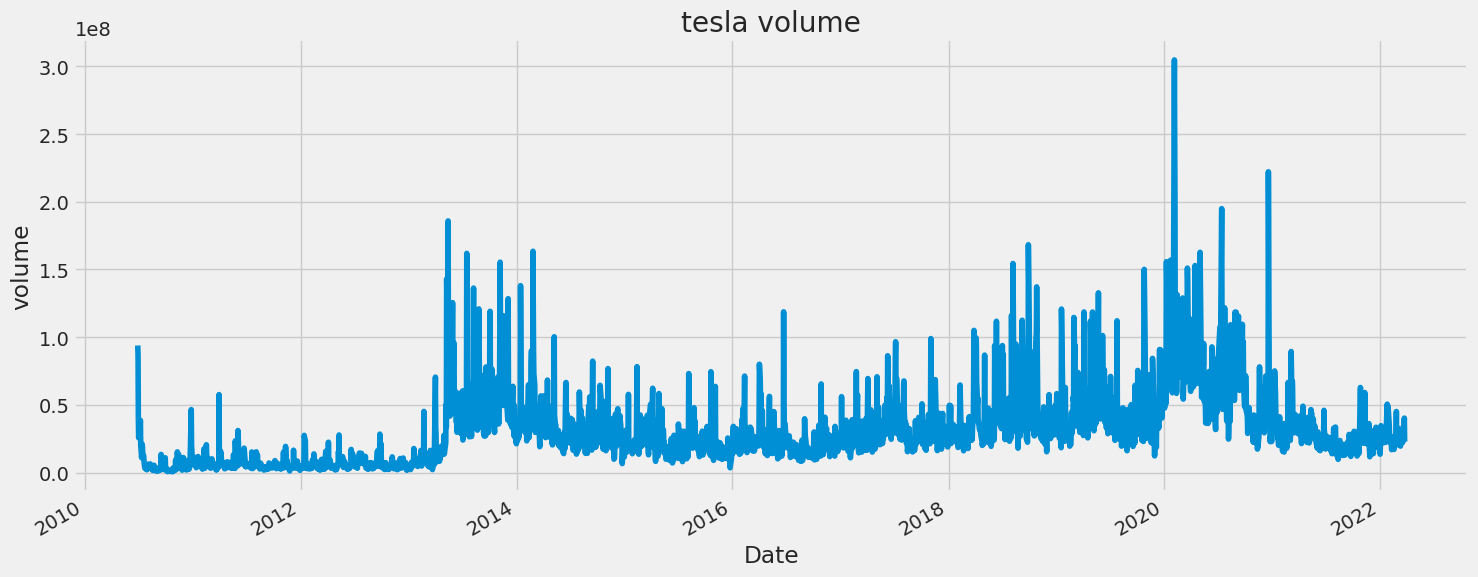

In [15]:
plt.figure(figsize=(15,6))
df['Volume'].plot()
plt.ylabel('volume')
plt.title('tesla volume')
plt.tight_layout()
plt.show()

# Data Preprocessing

### Prediction Column

In [16]:
dataset=df['Close']
dataset = pd.DataFrame(dataset)

data=dataset.values 

data.shape

(2956, 1)

### Normalizing Data

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

# Splitting the Data

In [18]:
train_size = int(len(data)*0.75)
test_size = len(data)-train_size

print(f'Train Size :{train_size}, Test size {test_size}')

train_data = scaled_data[:train_size,0:1] # 0->2217
test_data = scaled_data[train_size-60:,0:1] #  

Train Size :2217, Test size 739


In [19]:
train_data.shape, test_data.shape

((2217, 1), (799, 1))

# Creatring Training set

In [21]:
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [22]:
x_train= np.array(x_train)
y_train=np.array(y_train)

In [24]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# LSTM 

In [26]:
model = Sequential([
    LSTM(50,return_sequences=True , input_shape=(x_train.shape[1],1)),
    LSTM(64,return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(1)
    
    
])

model.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [28]:
callbacks = [EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)]
history = model.fit(x_train,y_train,epochs = 100,batch_size=32,callbacks=callbacks)

Epoch 1/100
68/68 [==============================] - 9s 59ms/step - loss: 8.9921e-05 - mean_absolute_error: 0.0059
Epoch 2/100
68/68 [==============================] - 4s 59ms/step - loss: 5.9895e-06 - mean_absolute_error: 0.0018
Epoch 3/100
68/68 [==============================] - 4s 59ms/step - loss: 4.7663e-06 - mean_absolute_error: 0.0016
Epoch 4/100
68/68 [==============================] - 4s 59ms/step - loss: 4.7591e-06 - mean_absolute_error: 0.0016
Epoch 5/100
68/68 [==============================] - 4s 59ms/step - loss: 5.5598e-06 - mean_absolute_error: 0.0017
Epoch 6/100
68/68 [==============================] - 4s 58ms/step - loss: 5.1311e-06 - mean_absolute_error: 0.0017
Epoch 7/100
68/68 [==============================] - 4s 59ms/step - loss: 4.9752e-06 - mean_absolute_error: 0.0017
Epoch 8/100
68/68 [==============================] - 4s 61ms/step - loss: 3.9803e-06 - mean_absolute_error: 0.0014
Epoch 9/100
68/68 [==============================] - 4s 58ms/step - loss: 4.9651

# Evalouation 

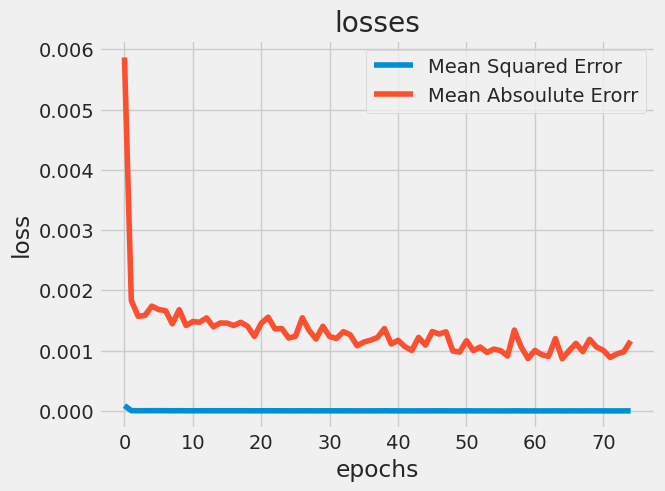

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error','Mean Absoulute Erorr'])
plt.title('losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# predection 

In [32]:
x_test = []
y_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])


In [33]:
x_test= np.array(x_test)
y_test=np.array(y_test)

In [34]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [35]:
prediction = model.predict(x_test)

prediction = scaler.inverse_transform(prediction)
prediction.shape

24/24 [==============================] - 1s 19ms/step


(739, 1)

In [36]:
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean(y_test-prediction)**2)
RMSE

20.049431570971258

# Visualizing the predation

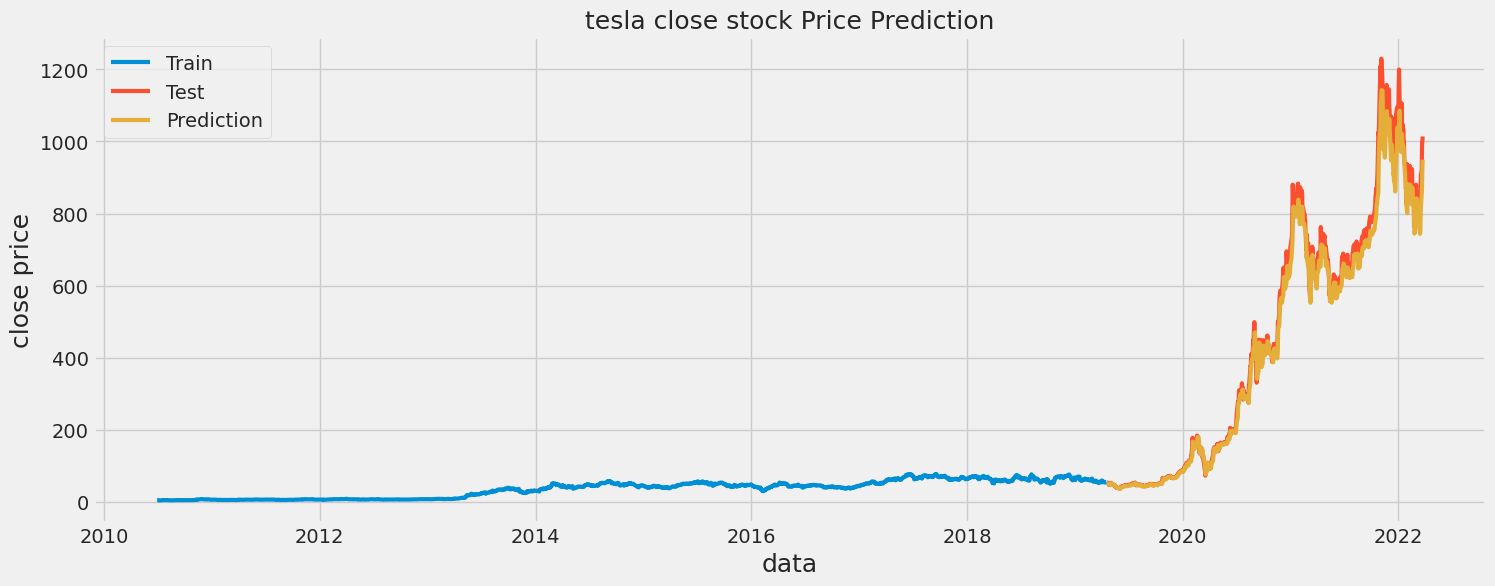

In [44]:
train = dataset.iloc[:train_size,0:1]
test = dataset.iloc[train_size:,0:1]

test['Prediction']=prediction

plt.figure(figsize=(16,6))
plt.title('tesla close stock Price Prediction',fontsize=18)
plt.xlabel('data',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'],linewidth=3)
plt.plot(test['Close'],linewidth=3)
plt.plot(test['Prediction'],linewidth=3)
plt.legend(['Train','Test','Prediction'])
plt.show()